<a href="https://colab.research.google.com/github/thiagobarral/geofusion-case/blob/main/geofusion_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando e importando as bibliotecas

In [1]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.3 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sweetviz as sv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from google.colab import drive

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Importando os dados

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/geofusion_data"

 DadosDesafioCientista.xlsx
'Desafio Técnico - Cientista de Dados.pdf'
 Previsaodefaturamentoepotencial.xlsx


In [6]:
fat_pot_df = pd.read_excel("/content/drive/My Drive/geofusion_data/DadosDesafioCientista.xlsx")

# Manipulando os dados

In [7]:
fat_pot_df.dtypes

codigo          float64
nome             object
cidade           object
estado           object
população       float64
popAte9         float64
popDe10a14      float64
popDe15a19      float64
popDe20a24      float64
popDe25a34      float64
popDe35a49      float64
popDe50a59      float64
popMaisDe60     float64
domiciliosA1    float64
domiciliosA2    float64
domiciliosB1    float64
domiciliosB2    float64
domiciliosC1    float64
domiciliosC2    float64
domiciliosD     float64
domiciliosE     float64
rendaMedia       object
faturamento     float64
potencial        object
dtype: object

In [8]:
fat_pot_df.rendaMedia.replace('-','', inplace = True)
fat_pot_df.rendaMedia = pd.to_numeric(fat_pot_df.rendaMedia)

In [9]:
fat_pot_df.dtypes

codigo          float64
nome             object
cidade           object
estado           object
população       float64
popAte9         float64
popDe10a14      float64
popDe15a19      float64
popDe20a24      float64
popDe25a34      float64
popDe35a49      float64
popDe50a59      float64
popMaisDe60     float64
domiciliosA1    float64
domiciliosA2    float64
domiciliosB1    float64
domiciliosB2    float64
domiciliosC1    float64
domiciliosC2    float64
domiciliosD     float64
domiciliosE     float64
rendaMedia      float64
faturamento     float64
potencial        object
dtype: object

In [10]:
fat_pot_df = fat_pot_df.dropna(subset=['rendaMedia'])

In [11]:
fat_pot_rj = fat_pot_df[fat_pot_df['estado'] == 'RJ']
fat_pot_rj.drop(['codigo', 'cidade', 'estado'], axis=1, inplace = True)

In [12]:
fat_pot_sp = fat_pot_df[fat_pot_df['estado'] == 'SP']
fat_pot_sp.drop(['codigo', 'cidade', 'estado', 'faturamento', 'potencial'], axis=1, inplace = True)

In [13]:
fat_pot_rj.groupby(['potencial']).sum()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
Alto,3680822.0,427791.0,198767.0,264021.0,279746.0,551489.0,740946.0,488485.0,729577.0,58206.0,83426.0,220727.0,222878.0,283908.0,207800.0,37141.0,116953.0,313355.0,56001880.0
Baixo,945462.0,126169.0,59029.0,77500.0,80167.0,153661.0,200732.0,108685.0,139519.0,68.0,1871.0,18882.0,45823.0,84605.0,84523.0,16480.0,56635.0,94882.0,43599468.0
Médio,2007641.0,278145.0,130105.0,168391.0,161636.0,319001.0,429216.0,230554.0,290593.0,2090.0,6583.0,46296.0,100276.0,183755.0,180793.0,35246.0,112355.0,147406.0,34406423.0


In [14]:
fat_pot_rj.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,43077.435065,5403.279221,2518.837662,3311.116883,3386.681818,6650.331169,8901.909091,5374.831169,7530.448052,391.974026,596.623377,1856.525974,2395.954545,3586.155844,3072.181818,577.058442,1856.772727,3608.071429,8.701803e+05
std,65336.035109,11008.972231,5037.002622,5851.900968,5698.898125,9196.873495,11710.858917,8118.995209,10425.899252,1429.321101,1552.853995,3004.463147,2817.055628,4391.463785,4065.856812,837.320073,2327.010887,6091.865305,4.430037e+05
min,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,2.000000,654.000000,2.465100e+04
25%,13443.250000,1512.250000,678.250000,945.000000,988.500000,2151.500000,2910.250000,1630.750000,2114.750000,0.000000,0.000000,393.000000,728.000000,1080.250000,774.750000,117.250000,430.500000,1486.000000,7.051840e+05
50%,26567.000000,3150.000000,1450.500000,2034.000000,2183.500000,4288.500000,5675.000000,3337.500000,4536.500000,0.000000,104.000000,833.500000,1497.000000,2458.000000,1883.500000,330.000000,1051.500000,1915.500000,8.220250e+05
75%,46557.500000,5650.750000,2648.500000,3450.250000,3435.750000,7143.500000,9596.250000,6333.750000,9282.000000,0.000000,351.750000,1909.000000,3079.250000,4261.000000,3627.250000,696.000000,2267.250000,2954.500000,9.325952e+05
max,667603.000000,122578.000000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.000000,14833.000000,63887.000000,2.915612e+06


# Visualizações

In [15]:
fat_pot_rj_pop = fat_pot_rj.iloc[:, 3:12]
fat_pot_rj_pop.head()

,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2
0,483.0,688.0,800.0,1675.0,2300.0,1784.0,2919.0,0.0,145.0
1,2188.0,2697.0,2630.0,4810.0,5308.0,2403.0,2397.0,0.0,0.0
2,399.0,597.0,762.0,1755.0,2076.0,1112.0,1419.0,0.0,96.0
3,538.0,660.0,685.0,1317.0,2007.0,1341.0,1986.0,114.0,178.0
4,3774.0,4892.0,4600.0,8660.0,12272.0,7157.0,8190.0,0.0,0.0


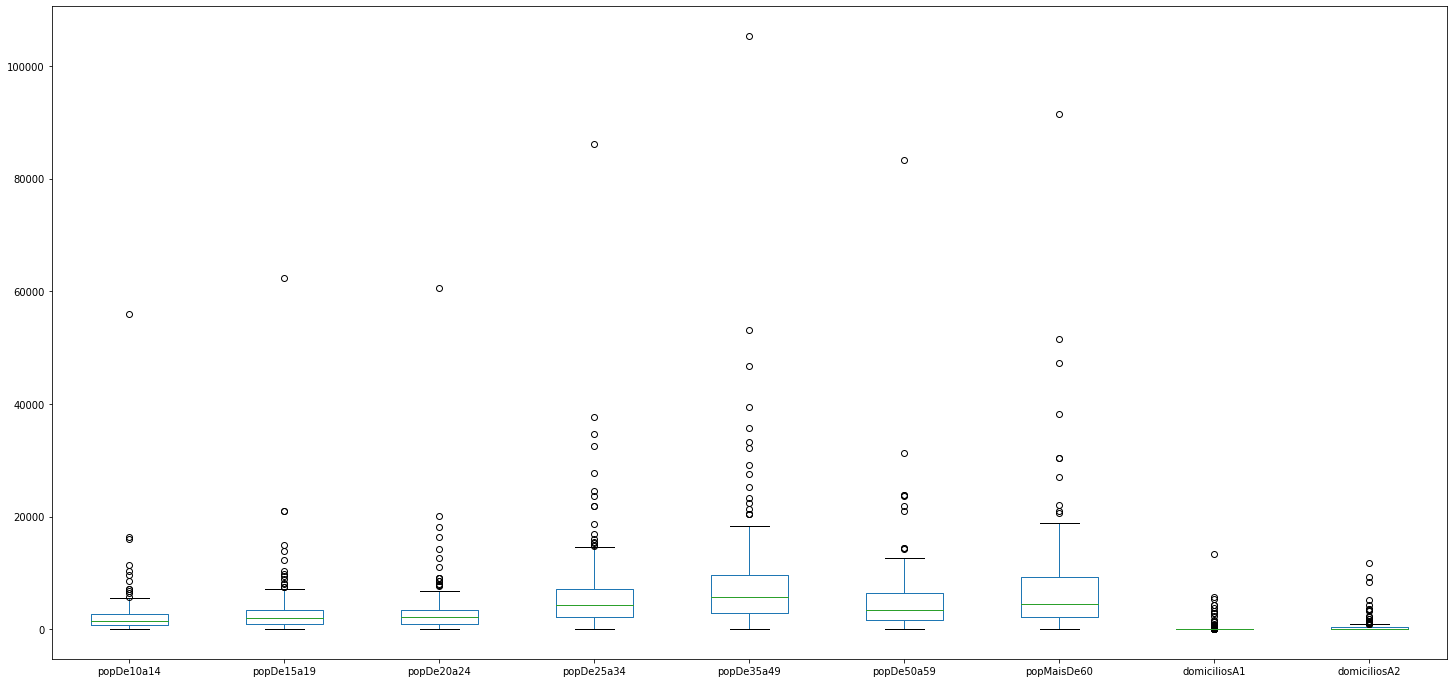

In [16]:
fat_pot_rj_pop.boxplot(grid=False, figsize=(25, 12))

In [17]:
fat_pot_rj_dom = fat_pot_rj.iloc[:, 13:20]
fat_pot_rj_dom.head()

,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,1242.0,1093.0,758.0,92.0,304.0,2501.0,932515.0
1,506.0,2040.0,2490.0,827.0,2506.0,931.0,588833.0
2,652.0,644.0,522.0,77.0,254.0,2391.0,874200.0
3,517.0,945.0,584.0,137.0,286.0,3727.0,912226.0
4,2821.0,5110.0,5422.0,1073.0,3261.0,1380.0,553020.0


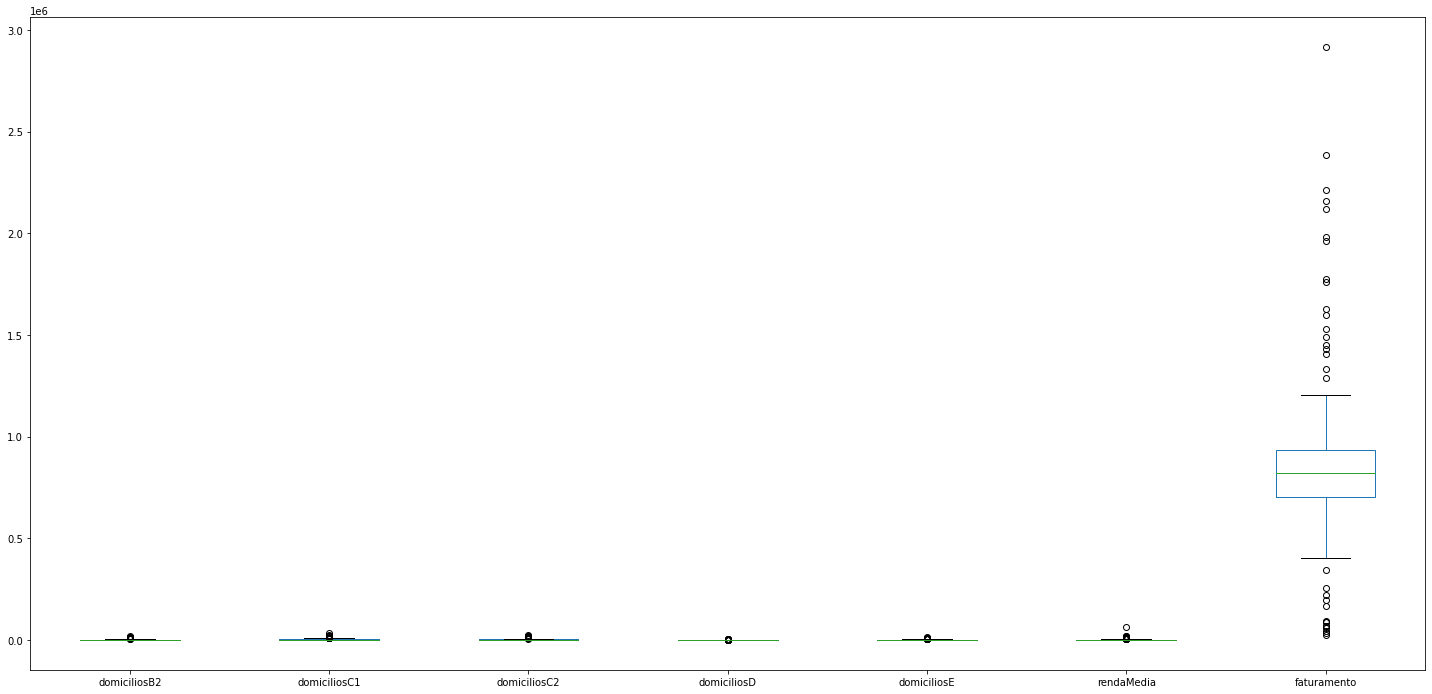

In [18]:
fat_pot_rj_dom.boxplot(grid=False, figsize=(25, 12))

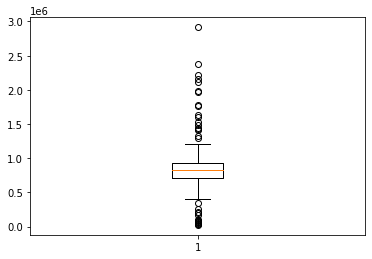

In [19]:
plt.boxplot(fat_pot_rj.faturamento)
plt.show()

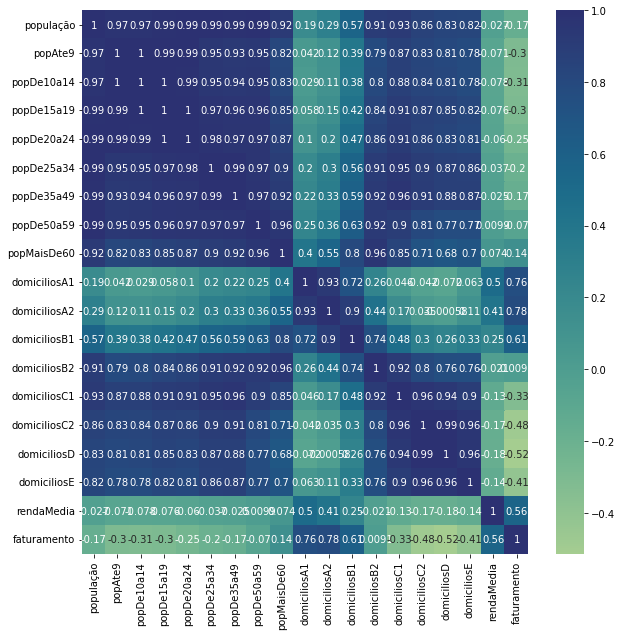

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(fat_pot_rj.corr(), annot=True, cmap='crest')

In [21]:
fat_pot_rj.drop(['população'], axis=1, inplace = True)
fat_pot_sp.drop(['população'], axis=1, inplace = True)

In [22]:
# my_report_rj = sv.analyze(fat_pot_rj)
# my_report_rj.show_html('Análise do faturamento do Rio de Janeiro.html')

In [23]:
# my_report_sp = sv.analyze(fat_pot_sp)
# my_report_sp.show_html('Análise do faturamento de São Paulo.html')

In [24]:
my_report = sv.compare([fat_pot_rj, 'Rio de Janeiro'], [fat_pot_sp, 'São Paulo'])
my_report.show_html('Análise do faturamento comparativo.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Análise do faturamento comparativo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Escolhendo o melhor modelo de regressão

In [25]:
fat_pot_rj_mr = fat_pot_rj.drop(['potencial', 'nome'], axis=1)

In [26]:
X = fat_pot_rj_mr.drop(columns = ['faturamento']).copy()
y = fat_pot_rj_mr['faturamento']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

Linear Regression

In [28]:
regr = LinearRegression()

In [29]:
regr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regr.predict(X_test)

In [31]:
print("Coeficientes: \n", regr.coef_)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

Coeficientes: 
 [  45.42595574  -91.68107797  199.72231836 -106.20503228  -24.03267652
  -73.65474914   82.1626684    -4.1681207   173.42220232 -173.56257256
  144.36159718   44.93942358  -37.76522267   -1.81507852 -225.37863713
    2.65220731   13.22454671]
MSE: 372988461168.32
RMSE: 610727.81
R2: -1.53


Support Vector Regression

In [32]:
# Fit regression model
svr = SVR().fit(X_train, y_train)
# Predict
y_pred = svr.predict(X_test)
print(y_pred)

[826529.08975237 826530.03654235 826521.34409898 826520.4465647
 826522.17269919 826523.09205369 826525.2346243  826523.24605981
 826528.45864084 826527.23659084 826524.0399821  826526.17712146
 826518.69524503 826524.97294171 826521.04622747 826521.64190297
 826519.31603677 826518.9227287  826527.97668735 826518.77751456
 826528.11643177 826528.26944607 826526.7374422  826523.49852659
 826519.87450341 826527.37208487 826525.31361902 826519.21699835
 826526.32663909 826525.53901119 826526.11778506 826525.60812345
 826518.80366808 826519.49783418 826521.79596869 826523.185797
 826520.67789735 826525.73467717 826522.48368698 826522.71379026
 826527.89362572 826526.49737795 826521.83032516 826525.19400433
 826518.57603904 826530.41481147 826525.79120438]


In [33]:
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 147526106775.24
RMSE: 384091.27
R2: -0.00


Decision Tree Regressor

In [34]:
# Fit regression model
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
# Predict
y_pred = regr.predict(X_test)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 21089132747.89
RMSE: 145220.98
R2: 0.86


# Otimizando o modelo modelo de regressão

In [35]:
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
param_grid = {
'min_samples_split': list(range(1,20)),
'min_samples_leaf': list(range(1, 20)),
'max_depth': list(range(2, 10))}
rnd_search = RandomizedSearchCV(regr, param_distributions = param_grid, n_iter=1000000000, cv=2, random_state=7)
rnd_search.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_iter=1000000000,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19]},
                   random_state=7)

In [37]:
rnd_search.best_params_

{'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 6}

In [38]:
# Predict
y_pred = rnd_search.predict(X_test)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 28031154134.72
RMSE: 167425.07
R2: 0.81


In [39]:
nomes_sp = fat_pot_sp['nome']
fat_pot_sp.drop(['nome'], axis=1, inplace =True)

In [40]:
y_pred_DTRot = rnd_search.predict(fat_pot_sp)

In [41]:
fat_pot_sp['nome'] = nomes_sp

# Escolhendo modelo de classificação

In [42]:
fat_pot_rj_mc = fat_pot_rj.drop(['faturamento', 'nome'], axis=1)

In [43]:
X = fat_pot_rj_mc.drop(columns = ['potencial']).copy()
y = fat_pot_rj_mc['potencial']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state = 10)

Logistic Regression

In [45]:
lgtic = make_pipeline(StandardScaler(), LogisticRegression())
lgtic.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [46]:
y_pred = lgtic.predict(X_test)

In [47]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 20  1]
 [ 0  5  9]]


In [48]:
accuracy_score(y_pred,y_test)

0.8723404255319149

k-Nearest Neighbors

In [49]:
neigh = make_pipeline(StandardScaler(), KNeighborsClassifier())
neigh.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [50]:
y_pred = neigh.predict(X_test)

In [51]:
print(confusion_matrix(y_test, y_pred))

[[10  0  2]
 [ 0 21  0]
 [ 0  2 12]]


In [52]:
accuracy_score(y_pred,y_test)

0.9148936170212766

In [53]:
nomes_sp = fat_pot_sp['nome']
fat_pot_sp.drop(['nome'], axis=1, inplace =True)

In [54]:
y_pred_KNN = neigh.predict(fat_pot_sp)

In [55]:
fat_pot_sp['nome'] = nomes_sp

Support Vector Machines

In [56]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [57]:
y_pred = clf.predict(X_test)

In [58]:
print(confusion_matrix(y_test, y_pred))

[[10  1  1]
 [ 0 21  0]
 [ 0  9  5]]


In [59]:
accuracy_score(y_pred,y_test)

0.7659574468085106

# Salvando os aquivos

In [60]:
fat_pot_sp['faturamento'] = y_pred_DTRot

In [61]:
fat_pot_sp['potencial'] = y_pred_KNN

In [62]:
fat_pot_sp['estado'] = 'SP'
fat_pot_rj['estado'] = 'RJ'

In [63]:
fat_pot_pred = pd.concat([fat_pot_rj, fat_pot_sp], axis=0)

In [64]:
fat_pot_pred.to_excel("/content/drive/My Drive/geofusion_data/Previsaodefaturamentoepotencial.xlsx")